# <font color=red>밑바닥부터 시작하는 딥러닝 1 - 한빛미디어, 사이토 고키</font>

### Contents (Chapter)

1. 헬로 파이썬 - 파이썬 기초 문법 소개, numpy, matplotlib
2. 퍼셉트론 - AND, NAND, OR 게이트
3. **`신경망 - 활성화 함수, 다차원 배열 계산, 출력층 설계, MNIST`**
4. 신경망 학습 - 손실 함수, 경사 하강법
5. 오차역전파법 - 역전파, 활성화 함수 구현
6. 학습 관련 기술들 - 매개변수 갱신, 배치 정규화, 하이퍼파라미터 값 찾기
7. 합성곱 신경망 (CNN) - 합성곱 계층, 풀링 계층, CNN 구현
8. 딥러닝 - 초기 역사, 딥러닝 활용
9. Appendix - Softmax with loss 계층의 계산 그래프

### 참고 자료

- [책 소개 링크](http://www.yes24.com/Product/Goods/34970929)
- [책 깃헙 링크](https://github.com/WegraLee/deep-learning-from-scratch)

---

## <font color=orange>Chapter 3. 신경망</font>

### 3.1 퍼셉트론에서 신경망으로

- (Multi-layer) 퍼셉트론으로 복잡한 함수를 표현할 수 있음
- But, 가중치를 설정하는 작업은 여전히 사람이 해야 함
- So, 매개변수의 적절한 값을 데이터로부터 자동으로 학습할 수 있도록 하는 것이 **신경망**의 특징

#### 3.1.1 신경망의 예

<br/>

<img src="https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled.png" width="300" height="300">

<br/>

- 신경망은 **입력층 (0층), 은닉층 (1층), 출력층 (2층)**으로 구성됨
- 여기서 은닉층의 뉴런은 (입력층과 출력층과 달리) 사람 눈에 보이지 않음

#### 3.1.2 퍼셉트론 복습

일반적인 퍼셉트론             |  편향을 명시한 퍼셉트론
:-------------------------:|:-------------------------:
![](https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled%201.png)  |  ![](https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled%202.png)

<br/>

$$
y = \left\{
    \begin{array}\\
        0 & (b + w_1x_1 + w_2x_2 <= 0) \\
        1 & (b + w_1x_1 + w_2x_2 > 0) \\
    \end{array}
\right.
$$

<br/>

- $b$는 **편향**을 뜻하며, 뉴런이 얼마나 쉽게 활성화 되는지를 제어
- $w_1, w_2$는 각 신호의 **가중치**를 뜻하며, 각 신호의 영향력을 제어
- <편향을 명시한 퍼셉트론> 그림에서는 $x_1, x_2, 1$에 각 신호의 가중치를 곱한 후, 다음 뉴런에 전달
- 다음 뉴런에서는 이 신호들의 값을 더해서 활성화 될지 여부를 결정
<br/>
<br/>
- 이때, 조건 분기의 동작 (0 이상이면 1 출력, 그렇지 않으면 0 출력)을 다음과 같이 $h(x)$로 정의
- 입력 신호의 총합이 $h(x)$ 함수를 거쳐서 변환되어, 그 값이 y의 출력됨

<br/>

$$y = h(b + w_1x_1 + w_2x_2)$$

$$
h(x) = \left\{
    \begin{array}\\
        0 & (x <= 0) \\
        1 & (x > 0) \\
    \end{array}
\right.
$$

#### 3.1.3 활성화 함수의 등장

- 위의 $h(x)$ 함수처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 **활성화 (Activation) 함수** 라고 정의
- 위에서 정의한 식을 조금 풀어서 적으면 다음과 같이 표현 가능
- 이 식에서 $a$는 가중치가 달린 입력 신호와 편향의 총합을 계산 한 값
- 즉, 가중치 신호를 조합한 결과가 a라는 노드가 되고, $h(x)$를 통과하여 y라는 노드로 변환

<br/>

$$a = b + w_1x_1 + w_2x_2$$

$$y = h(a)$$

<br/>

<img src="https://velog.velcdn.com/post-images%2Fdscwinterstudy%2Fd1593000-38e9-11ea-b942-cb9b82d31200%2F%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98%EC%9D%98-%EC%B2%98%EB%A6%AC-%EA%B3%BC%EC%A0%95.PNG" width="300" height="300">



### 3.2 활성화 함수

- 위에서 이야기 했던 $h(x)$ 함수는 임계값을 경계로 출력이 바뀌는데, 이를 **계단 (Step) 함수**라고 정의
- 따라서 퍼셉트론에서는 활성화 함수로 계단 함수를 이용
- 물론 신경망에서는 계단 함수 외에 다른 함수를 사용하고 있음

#### 3.2.1 시그모이드 (Sigmoid) 함수

<br/>

$$
h(x) = \frac{1}{1 + exp(-x)} = \frac{1}{1 + e^{-x}}
$$

<br/>

- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달
- 퍼셉트론과 신경망의 주된 차이는 활성화 함수라고 할 수 있음

#### 3.2.2 계단 함수 구현하기

- 계단 함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [1]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

def step_func(x):
    return 1 if x > 0 else 0

def array_step_func(arr):
    return np.array(arr > 0, dtype=np.int)

print(step_func(1))
print(step_func(-1), '\n')

print(array_step_func(np.array([1, 2])))
print(array_step_func(np.array([1, -1])))

1
0 

[1 1]
[1 0]


#### 3.2.3 계단 함수의 그래프

- 아래 그림에서 볼 수 있듯, 계단 함수는 0을 경계로 출력이 0에서 1로 또는 1에서 0으로 바뀜

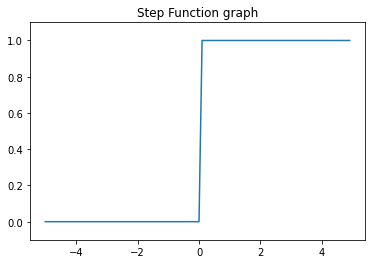

In [2]:
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
y = array_step_func(x)

plt.plot(x, y)
plt.ylim([-0.1, 1.1])
plt.title("Step Function graph")
plt.show()

#### 3.2.4 시그모이드 함수 구현하기

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1, 1, 2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [4]:
t = np.array([1, 2, 3])

print(1 + t) # 브로드캐스트 적용
print(1 / t)

[2 3 4]
[1.         0.5        0.33333333]


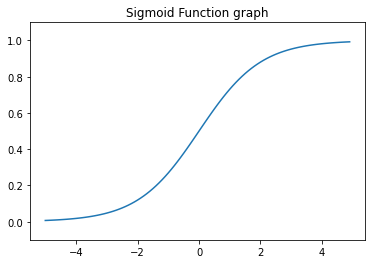

In [5]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim([-0.1, 1.1])
plt.title("Sigmoid Function graph")
plt.show()

#### 3.2.5 시그모이드 함수와 계단 함수 비교

1. [차이점] **매끄러움**
    - 이 매끄러움이 신경망 학습에서 매우 중요한 역할을 하게 될 것
    - 시그모이드 함수는 부드러운 곡선이며, 입력에 따라서 출력이 연속적으로 변화
    - 한편, 계단 함수는 0을 경계로 출력이 갑자기 바뀜
    
    
2. [차이점] **출력값의 범위**가 다름
    - 계단 함수는 0과 1 중 하나의 값만 출력
    - 한편, 시그모이드 함수는 실수도 출력 가능
    - 즉, 퍼셉트론에서는 뉴런 사이에 0이나 1만 흘렀지만, 신경망에서는 연속적인 실수가 흐름


3. [공통점] 큰 관점에서 보면 **같은 모양**을 보임
    - 입력이 작을 때는 0에 가깝고, 입력이 클 때는 1에 가까워짐
    - 즉, 두 함수 모두 입력이 중요하면 큰 값을 출력하고, 입력이 중요하지 않으면 작은 값을 출력
    - 또한 입력이 아무리 작거나, 커도 출력은 0과 1 사이의 값을 가짐
    
    
4. [공통점] **비선형 함수**
    - 시그모이드 함수는 곡선, 계단 함수는 구부러진 직선 형태의 비선형 함수 꼴을 보임

#### 3.2.6 비선형 함수

- $f(x) = ax + b$처럼 직선 형태를 띄는 것을 **선형 함수**라고 정의
- But, 위에서 봤던 시그모이드 함수나 계단 함수처럼 직선 1개로 그릴 수 없는 함수를 **비선형 함수**라고 정의
- 신경망의 활성화 함수를 선형 함수로 하는 경우에, 깊은 층이 의미가 없어지므로 비선형 함수를 사용해야 함
    - 은닉층이 없는 네트워크

#### 3.2.7 ReLU (Rectified Linear Unit) 함수

- ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수
- 이번 장에서는 시그모이드 함수를 사용하지만, 후반부에서는 ReLU 함수를 활성화 함수로 사용

<br/>

$$
h(x) = \left\{
    \begin{array}\\
        x & (x > 0) \\
        0 & (x <= 0) \\
    \end{array}
\right.
$$

In [6]:
def ReLU(x):
    return np.maximum(0, x) # 두 입력 중 더 큰 값을 선택해서 반환

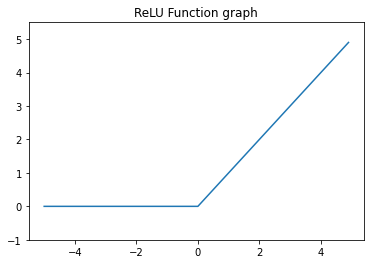

In [7]:
x = np.arange(-5, 5, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.ylim([-1, 5.5])
plt.title("ReLU Function graph")
plt.show()

### 3.3 다차원 배열의 계산

#### 3.3.1 다차원 배열

- 다차원 배열도 기본은 **숫자의 집합**
- 숫자가 한 줄로, 직사각형으로, N차원으로 나열된 것 등을 모두 **다차원 배열**이라고 정의
- 2차원 배열은 **행렬 (Matrix)**이라고 부르고, 가로 방향을 행, 세로 방향을 열이라고 정의

In [8]:
A = np.array([1, 2, 3, 4])
print(np.ndim(A), A.shape)

B = np.array([[1, 2], [3, 4], [5, 6]])
print(np.ndim(B), B.shape)

1 (4,)
2 (3, 2)


#### 3.3.2 행렬의 곱

<br/>

<img src="https://s1.md5.ltd/image/076c83bc7deb215d880f4d90dad15b13.png" width="400" height="400">

<br/>

- 행렬의 곱은 numpy에서 **np.dot()** 함수를 통해서 확인 가능
- 주의해야 할 것은 np.dot(A, B)와 np.dot(B, A)는 달라질 수도 있음
- 행렬의 곱을 수행하기 위해서는 **행렬 A의 열 수와 행렬 B의 행 수가 같아야 함**

In [9]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(np.dot(A, B), '\n')
print(np.dot(B, A))

[[19 22]
 [43 50]] 

[[23 34]
 [31 46]]


In [10]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])

print(A.shape, B.shape, '\n')
print(np.dot(A, B))

(3, 2) (2,) 

[23 53 83]


#### 3.3.3 신경망에서 행렬의 곱

<br/>

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA5MjdfNjMg/MDAxNTM4MDE0NDkwMjAw.mMfOmVBBpA8Xvb1mlM8XWFlezAzFdF4B8HV0vkp_S24g.YbV20K7bYmvoIP8H_8X1blDyWeOlfGUxTF0dnE9ISyMg.PNG.cheeryun/fig_3-14.png?type=w800" width="400" height="400">

<br/>

In [11]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])

print(X.shape, W.shape, '\n')
print(np.dot(X, W))

(2,) (2, 3) 

[ 5 11 17]


### 3.4 3층 신경망 구현하기

<br/>

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjQ3/MDAxNTI4NjEzNzA1OTEx.8LP6DXgs8QCQTeni1VRi9BueT5Uv_DHKpRYBPqi2tC4g.TQmRFx4Qp_1j5kqfyxxLFB1zBo7yIeMTskaQjwX73Pkg.PNG.ssdyka/fig_3-15.png?type=w2" width="400" height="400">

<br/>

- 입력층 (0층)은 2개, 첫 번째 은닉층 (1층)은 3개, 두 번째 은닉층 (2층)은 2개, 출력층 (3층)은 2개의 뉴런

#### 3.4.1 표기법 설명

<br/>

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfNzIg/MDAxNTI4NjEzNzA2MzM0.j9QOoSA1XXHdyvrUWy0ZP_f_nWneMFSd1xIFpSRDxHsg.XXxHvb4p00Wu9Kzn_n-nB_lKfE2iRFVax14IwQhUejcg.PNG.ssdyka/fig_3-16.png?type=w2" width="400" height="400">

<br/>

#### 3.4.2 각 층의 신호 전달 구현하기

<br/>

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjEx/MDAxNTI4NjEzNzA2NzUw.4uqh_gqJn64Ensn63s0fY1jpbspD5oilVYSu-ejMgs8g.Di4xipmNSMo-duyfkJNJAzfkqqS72dWbGSGxzhqcHjQg.PNG.ssdyka/fig_3-17.png?type=w2" width="400" height="400">

<br/>

$$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$$

$$A^{(1)} = XW^{(1)} + B^{(1)}$$

<br/>

- 위 그림에서는 편향 $b$을 뜻하는 뉴런 1이 추가 
- 편향은 오른쪽 아래 인덱스가 하나 밖에 없음 (앞 층의 편향 뉴런이 하나 뿐이기 때문)

In [12]:
X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape, W1.shape, B1.shape, '\n')

A1 = np.dot(X, W1) + B1
print(f"A1 = {A1}")

(2,) (2, 3) (3,) 

A1 = [0.3 0.7 1.1]


<br/>

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMTUy/MDAxNTI4NjEzNzA3MTgy.iInlQtedOrR3cr83cHlHh5iBC97Rd3CAn8lsfil2pJwg.VY7Bft0dgHkae7sJ4UrgO9CchUygWMF7DhqdSlMvzm0g.PNG.ssdyka/fig_3-18.png?type=w2" width="400" height="400">

<br/>

- 은닉층에서 가중치 합을 a로 표기하고, 활성화 함수 $h()$로 변환된 신호를 $z$로 표기
- 여기서 활성화 함수는 시그모이드 함수를 활용

In [13]:
Z1 = sigmoid(A1)

print(f"A1 = {A1}")
print(f"Z1 = {Z1}")

A1 = [0.3 0.7 1.1]
Z1 = [0.57444252 0.66818777 0.75026011]


<br/>

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjg4/MDAxNTI4NjEzNzA3NTY4.cwhPzaPClfzWeATMD4HaoIlB8fISmeCpZ0F0dOMNYgwg.VCGI5jJ2ZPizDF-7smAQrHaU4-lt5D7edc3wvJXctBUg.PNG.ssdyka/fig_3-19.png?type=w2" width="400" height="400">

<br/>

- 이번에는 1층의 출력값이었던 Z1이 입력이 된다는 점 빼고는 모두 동일

In [14]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape, W2.shape, B2.shape, '\n')

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(f"A2 = {A2}")
print(f"Z2 = {Z2}")

(3,) (3, 2) (2,) 

A2 = [0.51615984 1.21402696]
Z2 = [0.62624937 0.7710107 ]


<br/>

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMTgg/MDAxNTI4NjEzNzA3ODk1.OB5KMOlT1nVHC2soDuhlijxo7UTW6zxjoZ3MH1IiIVwg.r8GLKspRWCKdsp3xfel5Y34yJuK5K6AdmOQcBzX_iKgg.PNG.ssdyka/fig_3-20.png?type=w2" width="400" height="400">

<br/>

- 출력층의 활성화 함수는 입력을 그대로 출력해주는 항등 함수로 정의
- 출력층의 활성화 함수를 $\sigma()$로 표시하여 은닉층의 활성화 함수인 $h()$와 다름을 명시

In [15]:
def identity_func(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

print(Z2.shape, W3.shape, B3.shape, '\n')

A3 = np.dot(Z2, W3) + B3
Y = identity_func(A3)

print(f"A3 = {A3}")
print(f"Y = {Y}")

(2,) (2, 2) (2,) 

A3 = [0.31682708 0.69627909]
Y = [0.31682708 0.69627909]


#### 3.4.3 구현 정리

- 신경망 구현 관례에 따라 가중치만 W1 같이 대문자로 표현, 그 외 편향과 중간 결과는 소문자로 표현

In [16]:
# 가중치와 편향을 초기화하고, dic에 할당
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])    
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])    
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])    
    
    return network

# 입력 신호를 출력으로 변환하는 처리 과정 구현
# 신호가 순방향 (입력 -> 출력)으로 전달되므로 forward (순전파)로 정의
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identity_func(a3)
    
    return y

network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)

print(y)

[0.31682708 0.69627909]


### 3.5 출력층 설계하기

- 신경망은 분류와 회귀 모두 이용 가능
    - 분류: 데이터가 어느 class에 속하는지를 찾는 유형
    - 회귀: 데이터에서 연속적인 수치를 예측하는 유형
- 일반적으로 회귀에는 항등 함수, 분류에는 시그모이드 및 소프트맥스 함수를 활성화 함수로 사용

#### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

- **항등 (identity) 함수**는 입력을 그대로 출력하므로, 출력층에서 이를 사용하면 입력 신호가 그대로 출력
- 분류에서 사용하는 **소프트맥스 (softmax) 함수**
    - n은 출력층의 뉴런 수
    - $y_k$는 그 중 $k$번째 출력을 뜻함
- 소프트맥스 함수의 출력은 모든 입력 신호로부터 화살표를 받고 있음
- 그 이유는 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받았기 때문

<br/>

$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_i)}
$$

<br/>

항등 함수             |  소프트맥스 함수
:-------------------------:|:-------------------------:
![](https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled%208.png)  |  ![](https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled%209.png)

<br/>



In [17]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a

print(y)

[0.01821127 0.24519181 0.73659691]


In [18]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

#### 3.5.2 소프트맥스 함수 구현 시 주의점

- 위 `softmax` 함수는 컴퓨터로 계산할 때, **오버플로**라는 결함이 존재
- 지수 함수를 사용할 때, 너무 큰 값을 쉽게 내뱉는다는 한계
- 따라서 소프트맥스 함수를 개선

<br/>

<img src="https://velog.velcdn.com/images%2Fu_jinju%2Fpost%2Fcf944335-0e81-4e9d-9335-a7e0541d2ffc%2Fimage.png" width="400" height="400">

<br/>

1. C라는 임의의 정수를 분자와 분모 양쪽에 곱하기
2. C를 지수 함수 exp() 안으로 옮겨 logC로 만들기
3. logC를 C'이라는 새로운 기호로 바꾸기

- 이를 통해 알 수 있는 것
    - 소프트맥스의 지수 함수를 계산할 때, 어떤 정수를 더하거나 빼도 결과는 바뀌지 않음
    - C'에 어떤 값을 대입해도 상관 없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용

In [19]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))    # 소프트맥스 함수의 계산

array([nan, nan, nan])

In [20]:
c = np.max(a)
print(a - c)                     # nan만 나왔던 위 결과와 달리 정상 값이 나옴

np.exp(a - c) / np.sum(np.exp(a - c))

[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

#### 3.5.3 소프트맥스 함수의 특징

- 소프트맥스 함수의 출력은 0에서 1 사이의 실수
- 소프트맥스 함수 출력의 총합은 1
- 이러한 성질들을 통해 함수의 출력 값을 **확률**로 해석 가능
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음
- 신경망을 이용한 분류에서는 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식
- 기계학습 문제 풀이는 **학습과 추론**의 단계로 이뤄짐
    - 학습 (Train): 데이터를 통해서 모델이 학습하는 단계
    - 추론 (Inference): 학습한 모델로 미지의 데이터에 대해 추론 (분류)을 수행

In [21]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y, '\n') # y[0], y[1], y[2]의 확률값
np.sum(y) 

[0.01821127 0.24519181 0.73659691] 



1.0

#### 3.5.4 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함
- **분류**에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적
    - 0부터 9 중 하나로 분류하는 문제에서의 출력층 뉴런은 10개로 설정

### 3.6 손글씨 숫자 (MNIST) 인식

#### 3.6.1 MNIST 데이터셋

- MNIST라는 데이터셋은 손글씨 숫자 이미지 집합
    - 0부터 9까지의 숫자 이미지로 구성
    - 훈련 이미지는 60,000장, 시험 이미지는 10,000장
    - MNIST 이미지 데이터는 28 * 28 크기의 회색조 이미지 (1채널)
    - 각 픽셀은 0에서 255까지의 값을 취함
    - 각 이미지에는 그 이미지가 실제 의미하는 숫자가 레이블로 붙어 있음

In [22]:
import sys, os
import pickle
github_url = '/Users/paul/Desktop/github/deep-learning-from-scratch-master/'
sys.path.append(github_url)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [23]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)           # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)           # (28, 28)

img_show(img)

5
(784,)
(28, 28)


#### 3.6.2 신경망의 추론 처리

- MNIST 데이터셋은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성
    - 입력층 뉴런이 784개인 이유는 이미지 크기가 28 * 28 = 784
    - 출력층 뉴런이 10개인 이유는 0부터 9까지 숫자를 구분하기 때문
- 은닉층은 총 두 개로, 첫 번째 은닉층에는 50개의 뉴런, 두 번째 은닉층에는 100개의 뉴런 배치 (임의로 설정)
- 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행
    - 정규화 (Normalization): 데이터를 특정 범위로 변환하는 처리
    - 전처리 (Pre-processing): 신경망의 입력 데이터에 특정 변환을 가하는 것
    - 백색화 (Whitening): 전체 데이터를 균일하게 분포시키는 것

In [24]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    # 가중치와 편향 매개변수가 dictionary 변수로 저장되어 있는 pickle 파일
    with open(github_url + "ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [25]:
x, t = get_data()
network = init_network()
print(network.keys())

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스 (clas)
    if p == t[i]:
        accuracy_cnt += 1

print("가장 마지막 데이터의 예측 확률값과 class:")
print(y, p, '\n')
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
가장 마지막 데이터의 예측 확률값과 class:
[4.2882856e-04 2.0043008e-06 2.5405665e-03 2.0168895e-06 5.5917690e-04
 3.1262048e-04 9.9614757e-01 4.3499364e-07 6.3756829e-06 3.7751408e-07] 6 

Accuracy:0.9352


#### 3.6.3 배치 처리

- 아래의 결과에서 확인할 수 있듯, 다차원 배열의 대응하는 차원의 원소 수가 일치
- 가장 마지막 최종 결과는 원소가 10개인 1차원 배열 y가 출력

<br/>

<img src="https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled%2010.png" width="400" height="400">

<br/>

- 이미지 100장을 묶어서 나온 결과를 보면 다음과 같음
- 하나로 묶은 입력 데이터를 **배치 (batch)**라고 정의

<br/>

<img src="https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled%2011.png" width="400" height="400">

<br/>

In [26]:
### 개별로 predict 한 결과가 아닌, 배치 단위로 predict하여 결과 확인
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    # x[0:100], x[100:200], ...과 같은 형태
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("가장 마지막 데이터의 예측 확률값과 class의 shape:")
print(y_batch.shape, p.shape, '\n')
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

가장 마지막 데이터의 예측 확률값과 class의 shape:
(100, 10) (100,) 

Accuracy:0.9352


### 3.7 정리

- 신경망에서는 활성화 함수로 시그모이드, ReLU 함수 같은 비선형 함수를 활용
- numpy의 다차원 배열을 잘 사용하면, 신경망을 효율적으로 구현할 수 있음
- 출력층의 활성화 함수로 회귀에서는 항등 함수, 분류에서는 소프트맥스 함수를 사용
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정
- 입력 데이터를 묶은 것을 배치라고 하고, 추론 처리를 이 배치 단위로 진행하면 결과를 빨리 얻을 수 있음

### 추가 학습 - tensorflow를 활용한 MNIST 실습

2022-10-06 22:30:36.307210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-06 22:30:40.692392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2236 - accuracy: 0.9347
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0909 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0151 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.011

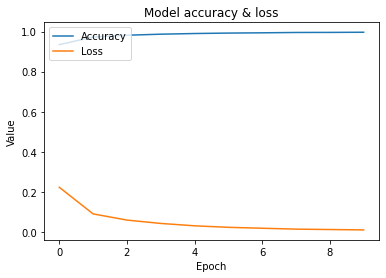

313/313 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9795
테스트 정확도: 0.9794999957084656


In [27]:
import tensorflow as tf

# 1. 데이터 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 간단한 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
history = model.fit(x_train, y_train, epochs=10)

# 6 훈련 과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy & loss')
plt.xlabel('Epoch') ; plt.ylabel('Value')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

# 7. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)